## Task 1

In [ ]:
import os, re, glob, shutil
from collections import Counter
from typing import List, Tuple, Dict, Iterable
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Folders
CORPUS_DIR    = "Corpus"
GENERATED_DIR = "Generated_tokens"
os.makedirs(CORPUS_DIR, exist_ok=True)
os.makedirs(GENERATED_DIR, exist_ok=True)

# Expected split files (provided by instructor; we do NOT re-split)
EXPECTED = [
    "Shakespeare_clean_full.txt",
    "Shakespeare_clean_train.txt",
    "Shakespeare_clean_valid.txt",
    "Shakespeare_clean_test.txt",
]

def ensure_in_corpus(filename: str):
    """Search filename in workspace and place it under Corpus/."""
    dst = os.path.join(CORPUS_DIR, filename)
    if os.path.exists(dst):
        return
    matches = glob.glob(f"**/{filename}", recursive=True)
    if not matches and os.path.exists(filename):
        matches = [filename]
    if matches:
        src = matches[0]
        if os.path.abspath(src) != os.path.abspath(dst):
            shutil.copy2(src, dst)

# Ensure Shakespeare splits are in Corpus/
for name in EXPECTED:
    ensure_in_corpus(name)

# Shakespeare paths
FULL_CLEAN  = os.path.join(CORPUS_DIR, "Shakespeare_clean_full.txt")
TRAIN_CLEAN = os.path.join(CORPUS_DIR, "Shakespeare_clean_train.txt")
VALID_CLEAN = os.path.join(CORPUS_DIR, "Shakespeare_clean_valid.txt")
TEST_CLEAN  = os.path.join(CORPUS_DIR, "Shakespeare_clean_test.txt")

# Simple IO
def read_text(path: str) -> str:
    with open(path, "r", encoding="utf-8") as f:
        return f.read()

def write_text(path: str, text: str):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)

# ---- RAW snapshot helpers
def _raw_compose_report(path: str, label: str) -> Dict[str, object]:
    if not os.path.exists(path):
        return {"set": label, "exists": False}
    txt = read_text(path)
    toks_ws = txt.split()
    n_ws = len(toks_ws)
    return {
        "set": label,
        "exists": True,
        "chars_raw": len(txt),
        "lines": (txt.count("\n") + 1) if txt else 0,
        "whitespace_tokens": n_ws,
        "alphabetic_words_[A-Za-z]+": len(re.findall(r"[A-Za-z]+", txt)),
        "digit_tokens": sum(1 for t in toks_ws if re.search(r"\d", t)),
        "punct_tokens": sum(1 for t in toks_ws if re.search(r"[^\w]", t)),
        "avg_token_len": (sum(len(t) for t in toks_ws) / n_ws) if n_ws else 0.0,
    }

def _top20_alpha_words(path: str, label: str):
    if not os.path.exists(path): return
    words_alpha = re.findall(r"[a-z]+", read_text(path).lower())
    cnt = Counter(words_alpha).most_common(20)
    print(f"\n[TOP 20 RAW A–Z WORDS] {label}")
    for w, c in cnt:
        print(f"{c:7d}  {w}")
    pd.DataFrame(cnt, columns=["word","count"]).to_csv(
        os.path.join(GENERATED_DIR, f"top_20_raw_words_{label}.csv"),
        index=False, encoding="utf-8"
    )

# ---- RAW snapshot (Shakespeare)
raw_rows = [
    _raw_compose_report(FULL_CLEAN,  "full"),
    _raw_compose_report(TRAIN_CLEAN, "train"),
    _raw_compose_report(VALID_CLEAN, "valid"),
    _raw_compose_report(TEST_CLEAN,  "test"),
]
df_raw_overview = (pd.DataFrame(raw_rows)
                   .loc[:, ["set","exists","chars_raw","lines","whitespace_tokens",
                            "alphabetic_words_[A-Za-z]+","digit_tokens","punct_tokens","avg_token_len"]]
                   .fillna(""))

print("\n=== RAW SPLIT OVERVIEW (Shakespeare) ===")
display(df_raw_overview)
df_raw_overview.to_csv(os.path.join(GENERATED_DIR, "split_raw_overview_shakespeare.csv"),
                       index=False, encoding="utf-8")

# Top-20 lists (Shakespeare)
_top20_alpha_words(TRAIN_CLEAN, "train")
if os.path.exists(VALID_CLEAN): _top20_alpha_words(VALID_CLEAN, "valid")
_top20_alpha_words(TEST_CLEAN,  "test")
if os.path.exists(FULL_CLEAN):  _top20_alpha_words(FULL_CLEAN, "full")

# BPE end-of-word symbol (used later)
WORD_END = "</w>"


=== RAW SPLIT OVERVIEW (Shakespeare) ===


,set,exists,chars_raw,lines,whitespace_tokens,alphabetic_words_[A-Za-z]+,digit_tokens,punct_tokens,avg_token_len
0,full,True,1115634,107156,190999,196336,3,43900,4.450332
1,train,True,864424,1,158546,162938,3,36233,4.452096
2,valid,True,104274,1,19090,19729,0,4595,4.462232
3,test,True,103975,1,19090,19563,0,4408,4.446569



[TOP 20 RAW A–Z WORDS] train
   5203  the
   4602  and
   4069  i
   3550  to
   2929  of
   2551  a
   2527  you
   2110  my
   2039  that
   1985  in
   1802  is
   1651  not
   1608  it
   1477  me
   1363  with
   1341  s
   1268  for
   1244  he
   1198  but
   1193  be

[TOP 20 RAW A–Z WORDS] valid
    570  the
    555  and
    464  i
    435  to
    342  a
    290  of
    248  you
    244  my
    243  that
    237  is
    195  in
    186  for
    185  s
    183  not
    182  it
    164  me
    152  this
    152  with
    148  be
    139  but

[TOP 20 RAW A–Z WORDS] test
    605  the
    576  and
    478  i
    400  to
    357  you
    325  of
    270  my
    268  a
    250  in
    228  is
    224  that
    194  not
    185  this
    175  me
    173  it
    163  with
    152  for
    142  have
    141  be
    140  s

[TOP 20 RAW A–Z WORDS] full
   6219  the
   5559  and
   4877  i
   4252  to
   3449  of
   3063  a
   3031  you
   2559  my
   2439  that
   2370  in
   2210  is
 

In [ ]:
# ============================ BLOCK 2 — TEXT NORMALIZATION (LETTERS-ONLY) =============================
_wsre = re.compile(r"\s+")

def words_from_text_norm(text: str, normalization: str = "standard") -> List[str]:
    """
    normalization:
      - 'standard': lowercase + ONLY letters → regex [a-z]+  (class expectation)
      - 'aggressive_clean': lowercase + keep only [a-z0-9] + whitespace
    """
    text = text.lower()
    if normalization == "aggressive_clean":
        text = re.sub(r"[^a-z0-9\s]+", " ", text)
        return [w for w in _wsre.split(text.strip()) if w]
    return re.findall(r"[a-z]+", text)

def words_from_file_norm(path: str, normalization: str = "standard") -> List[str]:
    return words_from_text_norm(read_text(path), normalization=normalization)


In [ ]:

WEBTEXT_CLEAN = os.path.join(CORPUS_DIR, "Webtext_clean_full.txt")

import nltk
nltk.download('webtext', quiet=True)
from nltk.corpus import webtext

# 1) Read all webtext files
raw_text = "\n".join(webtext.raw(fid) for fid in webtext.fileids())

# 2) Remove website URLs and emails
url_re = re.compile(r'https?://\S+|www\.\S+|\S+@\S+')
text_no_url = url_re.sub(' ', raw_text)

# 3) Remove emojis (common Unicode ranges)
emoji_re = re.compile(
    r"[\U0001F600-\U0001F64F"  # Emoticons
    r"\U0001F300-\U0001F5FF"   # Misc Symbols & Pictographs
    r"\U0001F680-\U0001F6FF"   # Transport & Map
    r"\U0001F1E0-\U0001F1FF"   # Flags
    r"\U0001F900-\U0001F9FF"   # Supplemental Symbols & Pictographs
    r"\u2600-\u27BF]"          # Misc Symbols & Dingbats
)
text_no_emoji = emoji_re.sub(' ', text_no_url)

# 4) Letters-only tokens via your standard normalizer ([a-z]+)
words_web = words_from_text_norm(text_no_emoji, normalization="standard")

# 5) Save and announce
write_text(WEBTEXT_CLEAN, " ".join(words_web) + "\n")
print(f"[WEBTEXT] Saved letters-only (URLs+emojis removed) to: {WEBTEXT_CLEAN}")
print(f"[WEBTEXT] tokens={len(words_web)} | unique={len(set(words_web))}")

# Use this as OTHER_SET everywhere else
OTHER_SET = WEBTEXT_CLEAN

# (Optional) quick RAW snapshot if the helper from Block 1 exists
if '_raw_compose_report' in globals():
    row = _raw_compose_report(OTHER_SET, "webtext")
    df_raw_web = pd.DataFrame([row])
    print("\n=== RAW SNAPSHOT (cleaned WebText file) ===")
    display(df_raw_web)

[WEBTEXT] Saved letters-only (URLs+emojis removed) to: Corpus/Webtext_clean_full.txt
[WEBTEXT] tokens=306578 | unique=16473

=== RAW SNAPSHOT (cleaned WebText file) ===


,set,exists,chars_raw,lines,whitespace_tokens,alphabetic_words_[A-Za-z]+,digit_tokens,punct_tokens,avg_token_len
0,webtext,True,1612682,2,306578,306578,0,0,4.260267


In [ ]:
# ============================ BLOCK 4 — DATASET OVERVIEW (LETTERS-ONLY) ===============================
def corpus_basic_stats_from_words(words: List[str]) -> Dict[str, float]:
    n_words = len(words)
    uniq = len(set(words))
    avg_len = sum(len(w) for w in words) / max(1, n_words)
    return {"words": n_words, "unique_words": uniq, "avg_word_length": avg_len}

def top_n_words(words: List[str], n: int = 20) -> List[Tuple[str, int]]:
    return Counter(words).most_common(n)

def summarize_split(path: str, label: str, train_vocab: set = None,
                    normalization: str = "standard"):
    if not path or not os.path.exists(path):
        return {"set": label, "exists": False}, []
    text = read_text(path)
    chars_raw = len(text)
    words = words_from_text_norm(text, normalization=normalization)
    stats = corpus_basic_stats_from_words(words)
    row = {"set": label, "exists": True, "chars_raw": chars_raw, **stats}
    if train_vocab is not None and len(words) > 0:
        oov = sum(1 for w in words if w not in train_vocab)
        row["oov_rate_vs_train"] = oov / len(words)
    else:
        row["oov_rate_vs_train"] = None
    return row, words

# Build overview under letters-only standard
summary_rows = []
train_row, train_words = summarize_split(TRAIN_CLEAN, "train", None, "standard")
summary_rows.append(train_row)
train_vocab = set(train_words)

valid_row, valid_words = (summarize_split(VALID_CLEAN, "valid", train_vocab, "standard")
                          if os.path.exists(VALID_CLEAN) else ({"set":"valid","exists":False}, []))
summary_rows.append(valid_row)

test_row, test_words = summarize_split(TEST_CLEAN, "test", train_vocab, "standard")
summary_rows.append(test_row)

full_row, full_words = (summarize_split(FULL_CLEAN, "full", train_vocab, "standard")
                        if os.path.exists(FULL_CLEAN) else ({"set":"full","exists":False}, []))
summary_rows.append(full_row)

other_row, other_words = summarize_split(OTHER_SET, "webtext", train_vocab, "standard")
summary_rows.append(other_row)

df_overview = (pd.DataFrame(summary_rows)
               .loc[:, ["set","exists","chars_raw","words","unique_words","avg_word_length","oov_rate_vs_train"]]
               .fillna(""))

print("\n=== DATASET OVERVIEW (letters-only standard) ===")
display(df_overview)
df_overview.to_csv(os.path.join(GENERATED_DIR, "dataset_overview.csv"),
                   index=False, encoding="utf-8")



=== DATASET OVERVIEW (letters-only standard) ===


,set,exists,chars_raw,words,unique_words,avg_word_length,oov_rate_vs_train
0,train,True,864424,162938,10415,4.096650,
1,valid,True,104274,19729,3236,4.068377,0.028283
2,test,True,103975,19563,3158,4.102285,0.023514
3,full,True,1115634,196336,11337,4.092566,0.005185
4,webtext,True,1612682,306578,16473,4.260267,0.251055


In [ ]:
# ============================ BLOCK 5 — BPE CORE (PAIR COUNTS & MERGING) ==============================
def word_to_symbols(word: str) -> Tuple[str, ...]:
    return tuple(list(word) + [WORD_END])

def corpus_to_symbol_sequences(words: Iterable[str]) -> List[Tuple[str, ...]]:
    return [word_to_symbols(w) for w in words]

def get_pair_counts(seqs: List[Tuple[str, ...]]) -> Counter:
    counts = Counter()
    for s in seqs:
        for i in range(len(s) - 1):
            counts[(s[i], s[i+1])] += 1
    return counts

def merge_pair_in_sequence(seq: Tuple[str, ...], a: str, b: str, ab: str) -> Tuple[str, ...]:
    out = []
    i, L = 0, len(seq)
    while i < L:
        if i < L-1 and seq[i] == a and seq[i+1] == b:
            out.append(ab); i += 2
        else:
            out.append(seq[i]); i += 1
    return tuple(out)

def apply_merge(seqs: List[Tuple[str, ...]], a: str, b: str) -> List[Tuple[str, ...]]:
    ab = a + b
    return [merge_pair_in_sequence(seq, a, b, ab) for seq in seqs]


In [ ]:
# ============================ BLOCK 6 — BPE TRAINER + TOKENS→CSV =====================================
class BPETokenizer:
    """Word-internal BPE with </w>. Train on TRAIN for k merges."""
    def __init__(self):
        self.merges: List[Tuple[str, str]] = []
        self.vocab:  List[str] = []
        self.normalization: str = "standard"

    def fit(self, corpus_path: str, k: int, normalization: str = "standard") -> None:
        self.normalization = normalization
        words = words_from_file_norm(corpus_path, normalization=normalization)
        seqs  = corpus_to_symbol_sequences(words)
        for _ in range(k):
            pair_counts = get_pair_counts(seqs)
            if not pair_counts: break
            (a, b), cnt = pair_counts.most_common(1)[0]
            if cnt < 2: break
            seqs = apply_merge(seqs, a, b)
            self.merges.append((a, b))
        vocab = set()
        for s in seqs:
            vocab.update(s)
        self.vocab = sorted(vocab, key=lambda t: (len(t), t))

def save_tokens_csv(tokens: List[str], csv_path: str):
    """Save token list to CSV with columns: rank, token, length, is_special."""
    os.makedirs(os.path.dirname(csv_path), exist_ok=True)
    specials = {WORD_END}
    df = pd.DataFrame({
        "rank":   list(range(len(tokens))),
        "token":  tokens,
        "length": [len(t) for t in tokens],
        "is_special": [t in specials for t in tokens],
    })
    df.to_csv(csv_path, index=False, encoding="utf-8")


In [ ]:
# ============================ BLOCK 7 — TOKENIZATION HELPERS & METRICS ================================
def apply_merges_to_word(word: str, merges: List[Tuple[str, str]]) -> List[str]:
    symbols = tuple(list(word) + [WORD_END])
    for a, b in merges:
        out = []
        i, L = 0, len(symbols)
        while i < L:
            if i < L-1 and symbols[i] == a and symbols[i+1] == b:
                out.append(a + b); i += 2
            else:
                out.append(symbols[i]); i += 1
        symbols = tuple(out)
    return list(symbols)

def tokenize_text_with_merges(text: str, merges: List[Tuple[str, str]],
                              normalization: str = "standard") -> List[List[str]]:
    words = words_from_text_norm(text, normalization=normalization)
    return [apply_merges_to_word(w, merges) for w in words]

def compute_token_stats(tokenized_words: List[List[str]]) -> Dict[str, float]:
    total_words  = len(tokenized_words)
    total_tokens = sum(len(toks) for toks in tokenized_words)
    avg_tokens_per_word = total_tokens / max(1, total_words)
    word_as_token = sum(1 for toks in tokenized_words if len(toks) == 1)
    word_as_token_rate = word_as_token / max(1, total_words)
    multi_char_tokens = sum(1 for toks in tokenized_words for t in toks if len(t) > 1)
    merge_use_rate = multi_char_tokens / max(1, total_tokens)
    unique_tokens = len({t for toks in tokenized_words for t in toks})
    unique_words  = len({tuple(toks) for toks in tokenized_words})
    type_compression = unique_tokens / max(1, unique_words)
    return {
        "total_words": float(total_words),
        "total_tokens": float(total_tokens),
        "avg_tokens_per_word": float(avg_tokens_per_word),
        "word_as_token_rate": float(word_as_token_rate),
        "merge_use_rate": float(merge_use_rate),
        "type_compression": float(type_compression),
    }


In [ ]:
# ============================ BLOCK 8 — TRAIN+SAVE (CANONICAL NAMES) + SANITY ========================
def train_and_eval_clean_task1(k: int, train_path: str, test_path: str,
                               normalization: str = "standard"):
    """
    Train BPE on TRAIN, write artifacts, evaluate on TRAIN/TEST/OTHER_SET,
    and return evaluation rows (incl. sanity).
    """
    # 1) Train
    bpe = BPETokenizer()
    bpe.fit(train_path, k=k, normalization=normalization)

    # 2) Save artifacts
    # 2a) always save normalization-suffixed copies
    toks_txt_norm = os.path.join(GENERATED_DIR, f"{normalization}_bpe_tokens_k{k}.txt")
    mrg_txt_norm  = os.path.join(GENERATED_DIR, f"{normalization}_bpe_merges_k{k}.txt")
    with open(toks_txt_norm, "w", encoding="utf-8") as f:
        for t in bpe.vocab: f.write(t + "\n")
    with open(mrg_txt_norm, "w", encoding="utf-8") as f:
        for a,b in bpe.merges: f.write(f"{a} {b}\n")
    save_tokens_csv(bpe.vocab, os.path.join(GENERATED_DIR, f"{normalization}_bpe_tokens_k{k}.csv"))

    # 2b) write CANONICAL filenames (exact names required by your assignment)
    if normalization == "standard":
        with open(os.path.join(GENERATED_DIR, f"bpe_tokens with k = {k}.txt"), "w", encoding="utf-8") as f:
            for t in bpe.vocab: f.write(t + "\n")
        with open(os.path.join(GENERATED_DIR, f"bpe_merges with k = {k}.txt"), "w", encoding="utf-8") as f:
            for a,b in bpe.merges: f.write(f"{a} {b}\n")
        save_tokens_csv(bpe.vocab, os.path.join(GENERATED_DIR, f"bpe_tokens with k = {k}.csv"))

    # 3) Sanity (expected_min_vocab ≈ |char_vocab| + k + 1 for </w>)
    train_words_for_char = words_from_file_norm(train_path, normalization=normalization)
    char_vocab = set("".join(train_words_for_char))
    expected_min_vocab = len(char_vocab) + k + 1
    sanity_row = {
        "normalization": normalization, "k": k, "set": "sanity",
        "merges_count": len(bpe.merges), "vocab_size": len(bpe.vocab),
        "expected_min_vocab": expected_min_vocab
    }

    # 4) Evaluate on TRAIN / TEST / OTHER_SET
    results = []
    for set_name, path in [("train", train_path), ("test", test_path), ("webtext", OTHER_SET)]:
        if not path or not os.path.exists(path): continue
        text = read_text(path)
        toks = tokenize_text_with_merges(text, bpe.merges, normalization=normalization)
        stats = compute_token_stats(toks)
        results.append({"normalization": normalization, "k": k, "set": set_name, **stats})

    results.append(sanity_row)
    return results


In [ ]:
# ============================ BLOCK 9 — EXPERIMENT KNOBS + LOOP + TABLES =============================

K_LIST = [1000, 1200, 1400, 1600, 1800, 2000]
NORMALIZATIONS = ["standard", "aggressive_clean"]

# Run experiment
rows = []
for norm in NORMALIZATIONS:
    for k in K_LIST:
        rows.extend(train_and_eval_clean_task1(k, TRAIN_CLEAN, TEST_CLEAN, normalization=norm))
        note = " (canonical saved)" if norm == "standard" else ""  # canonical files only for 'standard'
        print(f"[{norm} | k={k}] artifacts written{note}.")

df_task1 = (pd.DataFrame(rows)
            .sort_values(["normalization","set","k"])
            .reset_index(drop=True))

# Save results + sanity CSVs
df_task1.to_csv(os.path.join(GENERATED_DIR, "task1_results_with_norms.csv"),
                index=False, encoding="utf-8")
if "sanity" in df_task1["set"].unique():
    df_sanity = (df_task1[df_task1["set"] == "sanity"]
                 .loc[:, ["normalization","k","merges_count","vocab_size","expected_min_vocab"]]
                 .sort_values(["normalization","k"]))
    df_sanity.to_csv(os.path.join(GENERATED_DIR, "task1_sanity_report.csv"),
                     index=False, encoding="utf-8")
    print("\n[SANITY]")
    print(df_sanity.to_string(index=False))

# Quick pivots in console
for metric in ["avg_tokens_per_word","word_as_token_rate","merge_use_rate","type_compression"]:
    print(f"\n=== {metric} ===")
    pivot = df_task1.pivot_table(index=["set","k"], columns="normalization", values=metric)
    print(pivot.to_string())


[standard | k=1000] artifacts written (canonical saved).
[standard | k=1200] artifacts written (canonical saved).
[standard | k=1400] artifacts written (canonical saved).
[standard | k=1600] artifacts written (canonical saved).
[standard | k=1800] artifacts written (canonical saved).
[standard | k=2000] artifacts written (canonical saved).
[aggressive_clean | k=1000] artifacts written.
[aggressive_clean | k=1200] artifacts written.
[aggressive_clean | k=1400] artifacts written.
[aggressive_clean | k=1600] artifacts written.
[aggressive_clean | k=1800] artifacts written.
[aggressive_clean | k=2000] artifacts written.

[SANITY]
   normalization    k  merges_count  vocab_size  expected_min_vocab
aggressive_clean 1000        1000.0       996.0              1032.0
aggressive_clean 1200        1200.0      1186.0              1232.0
aggressive_clean 1400        1400.0      1381.0              1432.0
aggressive_clean 1600        1600.0      1568.0              1632.0
aggressive_clean 1800     

In [ ]:
# ---- DOWNLOAD all CSVs in Generated_tokens/ as a single ZIP ----
import zipfile, glob, os
from google.colab import files

zip_path = "task1_csv_exports.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for p in glob.glob(os.path.join(GENERATED_DIR, "*.csv")):
        z.write(p, arcname=os.path.basename(p))
        print("Added:", p)

files.download(zip_path)


Added: Generated_tokens/bpe_tokens with k = 1200.csv
Added: Generated_tokens/bpe_tokens with k = 1000.csv
Added: Generated_tokens/bpe_tokens with k = 1600.csv
Added: Generated_tokens/task1_sanity_report.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k1200.csv
Added: Generated_tokens/top_20_raw_words_full.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k2000.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k1600.csv
Added: Generated_tokens/standard_bpe_tokens_k1200.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k1400.csv
Added: Generated_tokens/bpe_tokens with k = 1800.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k1000.csv
Added: Generated_tokens/dataset_overview.csv
Added: Generated_tokens/bpe_tokens with k = 2000.csv
Added: Generated_tokens/aggressive_clean_bpe_tokens_k1800.csv
Added: Generated_tokens/standard_bpe_tokens_k2000.csv
Added: Generated_tokens/split_raw_overview_shakespeare.csv
Added: Generated_tokens/standard_bpe_tokens_k1400.csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

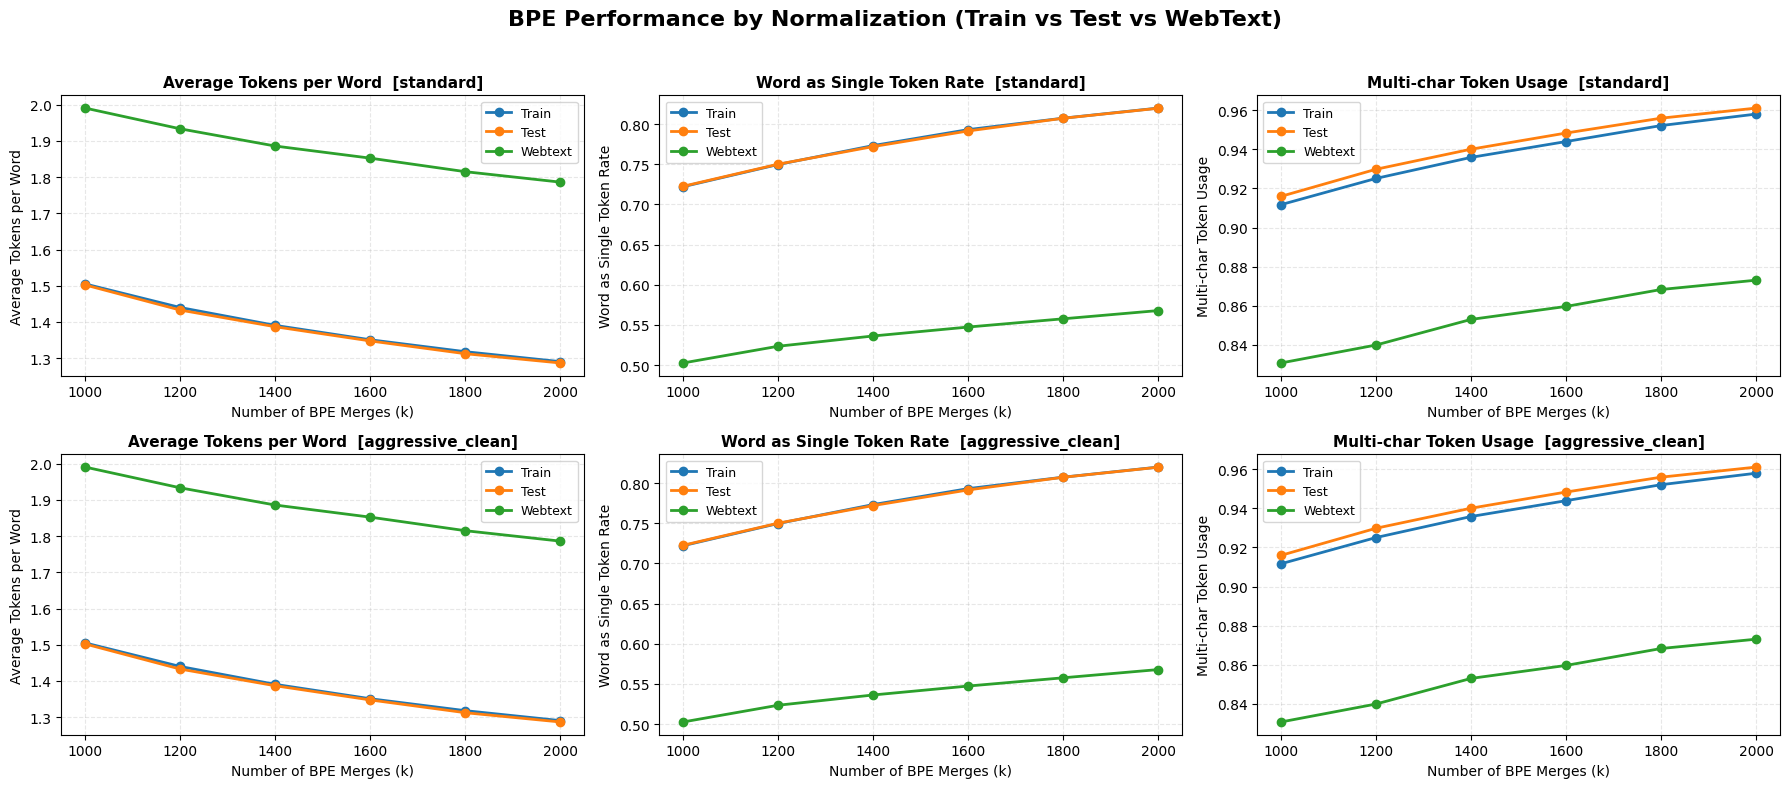

In [ ]:
# ---- BLOCK 10: OVERVIEW PLOTS (Train/Test/WebText) ---------------------------

metrics = ['avg_tokens_per_word', 'word_as_token_rate', 'merge_use_rate']
titles  = ['Average Tokens per Word', 'Word as Single Token Rate', 'Multi-char Token Usage']

# Safety: ensure 'k' is numeric for sorting/ticks
if 'k' in df_task1.columns:
    df_task1 = df_task1.copy()
    df_task1['k'] = pd.to_numeric(df_task1['k'], errors='coerce')
    df_task1 = df_task1.dropna(subset=['k'])
    df_task1['k'] = df_task1['k'].astype(int)

fig, axes = plt.subplots(len(NORMALIZATIONS), len(metrics), figsize=(18, 8), squeeze=False)
fig.suptitle('BPE Performance by Normalization (Train vs Test vs WebText)', fontsize=16, fontweight='bold')

for r, norm in enumerate(NORMALIZATIONS):
    df_norm = df_task1[df_task1["normalization"] == norm]
    for c, (metric, title) in enumerate(zip(metrics, titles)):
        ax = axes[r][c]
        for s in ['train', 'test', 'webtext']:
            if metric in df_norm.columns and s in df_norm['set'].unique():
                subset = df_norm[df_norm["set"] == s].sort_values("k")
                if not subset.empty:
                    ax.plot(subset["k"], subset[metric], marker="o", linewidth=2.0, markersize=6, label=s.title())
        ax.set_title(f"{title}  [{norm}]", fontsize=11, fontweight='bold')
        ax.set_xlabel('Number of BPE Merges (k)', fontsize=10)
        ax.set_ylabel(title, fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='--')
        xticks = sorted(df_norm["k"].unique()) if not df_norm.empty else []
        ax.set_xticks(xticks)

        # Optional: small margins so markers don't touch frame
        ax.margins(x=0.05)

        # Only show legend if we plotted at least one line
        if ax.has_data():
            ax.legend(fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(GENERATED_DIR, "task1_overview_plots.png"), dpi=200, bbox_inches="tight")
plt.show()


##Task 2

In [ ]:
# =============================================================================
# TASK 2 — BLOCK 1: IMPORTS AND SETUP
# =============================================================================

import math
from typing import Optional, List, Tuple, Dict
import os, re, random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Essential constants and functions from Task 1
CORPUS_DIR = "Corpus"
GENERATED_DIR = "Generated_tokens"
TRAIN_CLEAN = os.path.join(CORPUS_DIR, "Shakespeare_clean_train.txt")
VALID_CLEAN = os.path.join(CORPUS_DIR, "Shakespeare_clean_valid.txt")
TEST_CLEAN = os.path.join(CORPUS_DIR, "Shakespeare_clean_test.txt")
K_LIST = [1000, 1200, 1400, 1600, 1800, 2000]
WORD_END = "</w>"

_wsre = re.compile(r"\s+")

# Task 2 specific tokens
EOS = "<eos>"
BOS = "<bos>"
random.seed(42)


In [ ]:
# =============================================================================
# TASK 2 — BLOCK 2: UTILITY FUNCTIONS
# =============================================================================

def read_text(path: str) -> str:
    with open(path, "r", encoding="utf-8") as f:
        return f.read()

def words_from_text(text: str, lowercase: bool = True) -> List[str]:
    if lowercase:
        text = text.lower()
    return [w for w in _wsre.split(text.strip()) if w]

def load_merges(merges_path: str) -> List[Tuple[str, str]]:
    merges = []
    with open(merges_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                merges.append((parts[0], parts[1]))
    return merges

def apply_merges_to_word(word: str, merges: List[Tuple[str, str]]) -> List[str]:
    symbols = tuple(list(word) + [WORD_END])
    for a, b in merges:
        out = []
        i, L = 0, len(symbols)
        while i < L:
            if i < L-1 and symbols[i] == a and symbols[i+1] == b:
                out.append(a + b); i += 2
            else:
                out.append(symbols[i]); i += 1
        symbols = tuple(out)
    return list(symbols)

def tokenize_lines_with_merges(text: str, merges: List[Tuple[str, str]]) -> List[List[str]]:
    """Convert text to line-based token sequences for n-gram training."""
    token_lines: List[List[str]] = []
    for line in text.strip().splitlines():
        words = words_from_text(line)
        if not words:
            continue
        toks: List[str] = []
        for w in words:
            toks.extend(apply_merges_to_word(w, merges))
        toks.append(EOS)
        token_lines.append(toks)
    return token_lines


In [ ]:
# N-GRAM BUILDING FUNCTIONS

def add_bos_context(line_tokens: List[str], n: int) -> List[str]:
    """Add beginning-of-sentence tokens for n-gram context."""
    if n <= 1:
        return line_tokens
    return [BOS] * (n-1) + line_tokens

def build_ngrams(token_lines: List[List[str]], n: int):
    """Build n-gram counts and vocabulary from tokenized lines."""
    vocab = set()
    ngram_counts = Counter()
    context_counts = Counter()

    for line in token_lines:
        line = add_bos_context(line, n)
        vocab.update(line)
        for i in range(n-1, len(line)):
            context = tuple(line[i-n+1:i])
            token   = line[i]
            ngram_counts[context + (token,)] += 1
            context_counts[context]          += 1

    return ngram_counts, context_counts, sorted(vocab)

In [ ]:
 # N-GRAM LANGUAGE MODEL CLASS

class NGramLM:
    """N-gram Language Model with multiple smoothing techniques."""

    def __init__(self, n: int, token_lines: List[List[str]]):
        assert n >= 1
        self.n = n
        self.ng_counts, self.ctx_counts, self.vocab = build_ngrams(token_lines, n)
        self.V = len(self.vocab)
        self.lower = NGramLM(n-1, token_lines) if n > 1 else None

    def p_ml(self, context: Tuple[str, ...], token: str) -> float:
        """Maximum Likelihood probability estimation."""
        if self.n == 1:
            total = sum(self.ng_counts.values())
            return self.ng_counts.get((token,), 0) / max(1, total)
        c = self.ctx_counts.get(context, 0)
        if c == 0:
            return 0.0
        return self.ng_counts.get(context + (token,), 0) / c

    def p_laplace(self, context: Tuple[str, ...], token: str) -> float:
        """Laplace (add-one) smoothing probability estimation."""
        if self.n == 1:
            num = self.ng_counts.get((token,), 0) + 1
            den = sum(self.ng_counts.values()) + self.V
            return num / den
        c   = self.ctx_counts.get(context, 0)
        num = self.ng_counts.get(context + (token,), 0) + 1
        den = c + self.V
        return num / max(1, den)

    def p_interpolated(self, context: Tuple[str, ...], token: str,
                       lambdas: Optional[List[float]] = None, use_laplace: bool = True) -> float:
        """Linear interpolation of different n-gram orders."""
        if lambdas is None:
            lambdas = [1.0/self.n] * self.n
        assert len(lambdas) == self.n

        prob = 0.0
        current_model = self

        for order in range(self.n, 0, -1):
            if order == 1:
                p = current_model.p_laplace((), token) if use_laplace else current_model.p_ml((), token)
            else:
                need = order - 1
                if len(context) >= need:
                    ctx = context[-need:]
                else:
                    padding_needed = need - len(context)
                    ctx = tuple([BOS] * padding_needed) + context

                p = current_model.p_laplace(ctx, token) if use_laplace else current_model.p_ml(ctx, token)

            prob += lambdas[order-1] * p

            if current_model.lower is not None:
                current_model = current_model.lower

        return prob

    def p_backoff_katz(self, context: Tuple[str, ...], token: str) -> float:
        """Simplified Katz backoff (without Good-Turing discounting)."""
        if self.n == 1:
            return self.p_laplace((), token)

        need = self.n - 1
        if len(context) >= need:
            ctx = context[-need:]
        else:
            padding_needed = need - len(context)
            ctx = tuple([BOS] * padding_needed) + context

        c_ctx = self.ctx_counts.get(ctx, 0)
        c_ng = self.ng_counts.get(ctx + (token,), 0)

        if c_ng > 0:
            # Discounted ML estimate (simplified)
            discount = 0.75  # Simple absolute discounting
            prob_discounted = max(c_ng - discount, 0) / c_ctx
            return prob_discounted
        else:
            # Backoff with alpha weight
            alpha = 0.4  # Simplified backoff weight
            return alpha * self.lower.p_backoff_katz(context, token)

    def p_backoff(self, context: Tuple[str, ...], token: str) -> float:
        """Stupid Backoff (not a true probability distribution)."""
        if self.n == 1:
            return self.p_laplace((), token)

        need = self.n - 1
        if len(context) >= need:
            ctx = context[-need:]
        else:
            padding_needed = need - len(context)
            ctx = tuple([BOS] * padding_needed) + context

        c_ctx = self.ctx_counts.get(ctx, 0)
        c_ng = self.ng_counts.get(ctx + (token,), 0)

        if c_ctx > 0 and c_ng > 0:
            return c_ng / c_ctx  # ML estimate if seen
        else:
            # Backoff with penalty
            return 0.4 * self.lower.p_backoff(context, token)

In [ ]:
# PERPLEXITY CALCULATION

def flatten_for_eval(token_lines: List[List[str]]) -> List[str]:
    """Flatten token lines for evaluation (BOS handling done in perplexity)."""
    flat: List[str] = []
    for line in token_lines:
        flat.extend(line)
    return flat

def perplexity(model: NGramLM, token_lines: List[List[str]], mode: str = "laplace",
               lambdas: Optional[List[float]] = None) -> float:
    """Calculate perplexity following slide methodology exactly."""
    log_prob_sum = 0.0
    count = 0

    for line in token_lines:
        # Initialize context with BOS tokens at start of each sentence
        context = [BOS] * (model.n - 1) if model.n > 1 else []

        # Process each token in the line (including EOS)
        for token in line:
            # Create context tuple for probability calculation
            ctx = tuple(context[-(model.n-1):]) if model.n > 1 else tuple()

            # Calculate probability based on smoothing method
            if mode == "ml":
                p = model.p_ml(ctx, token)
            elif mode == "laplace":
                p = model.p_laplace(ctx, token)
            elif mode == "interp":
                p = model.p_interpolated(ctx, token, lambdas=lambdas, use_laplace=True)
            elif mode == "backoff":
                p = model.p_backoff(ctx, token)
            elif mode == "katz":
                p = model.p_backoff_katz(ctx, token)
            else:
                raise ValueError("mode must be one of: ml, laplace, interp, backoff, katz")

            # Add log probability
            if p > 0:
                log_prob_sum += math.log(p)
            else:
                log_prob_sum += float('-inf')
            count += 1

            # Update context window
            context = (context + [token])[-(model.n - 1):] if model.n > 1 else context

            # Reset context at sentence boundary
            if token == EOS:
                context = [BOS] * (model.n - 1) if model.n > 1 else []

    # Calculate final perplexity
    avg_log_prob = log_prob_sum / count if count > 0 else float('-inf')
    return math.exp(-avg_log_prob)


In [ ]:
# DATA LOADING FUNCTIONS

def find_merges_file(k: int, verbose: bool = True) -> str:
    """Find BPE merges file with flexible naming conventions."""
    candidates = [
        os.path.join(GENERATED_DIR, f"bpe_merges with k = {k}.txt"),
        os.path.join(GENERATED_DIR, f"standard_bpe_merges_k{k}.txt"),
        os.path.join(GENERATED_DIR, f"aggressive_clean_bpe_merges_k{k}.txt"),
        os.path.join(GENERATED_DIR, f"bpe_merges_k{k}.txt"),
        os.path.join(GENERATED_DIR, f"bpe_merges_k{k}_webtext_clean.txt"),
    ]
    for path in candidates:
        if os.path.exists(path):
            if verbose:
                print(f"[Found] Using merges file: {path}")
            return path
    raise FileNotFoundError(f"No merges file found for k={k}. Tried: {candidates}")

def load_token_lines_for_k(k: int):
    """Load and tokenize train/validation/test data for given k."""
    merges_path = find_merges_file(k, verbose=True)
    merges = load_merges(merges_path)

    tr_text = read_text(TRAIN_CLEAN)
    va_text = read_text(VALID_CLEAN)
    te_text = read_text(TEST_CLEAN)

    tr_tok = tokenize_lines_with_merges(tr_text, merges)
    va_tok = tokenize_lines_with_merges(va_text, merges)
    te_tok = tokenize_lines_with_merges(te_text, merges)
    return merges, tr_tok, va_tok, te_tok

In [ ]:
# TRAINING AND EVALUATION FUNCTIONS

def grid_simplex_lambdas(n: int, step: float = 0.2) -> List[List[float]]:
    """Generate lambda weight combinations that sum to 1.0."""
    if n == 1:
        return [[1.0]]

    grids = []
    def rec(prefix, remaining, slots):
        if slots == 1:
            grids.append(prefix + [round(remaining, 10)])
            return
        t = 0.0
        while t <= remaining + 1e-9:
            rec(prefix + [round(t,10)], round(remaining - t,10), slots-1)
            t = round(t + step, 10)

    rec([], 1.0, n)
    return [g for g in grids if abs(sum(g) - 1.0) < 1e-6]

def train_and_eval_for_k(k: int, n_max: int = 4, tune_interp: bool = True) -> pd.DataFrame:
    """Train and evaluate n-gram models for given BPE vocabulary size k."""
    print(f"\n=== Processing k={k} ===")
    try:
        _, tr_tok, va_tok, te_tok = load_token_lines_for_k(k)
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return pd.DataFrame()

    results = []
    for n in range(1, n_max+1):
        print(f"Training {n}-gram model...")
        lm = NGramLM(n, tr_tok)

        # Basic evaluations (ML, Laplace)
        pp_valid_ml = perplexity(lm, va_tok, mode="ml")
        pp_valid_laplace = perplexity(lm, va_tok, mode="laplace")
        pp_test_ml = perplexity(lm, te_tok, mode="ml")
        pp_test_laplace = perplexity(lm, te_tok, mode="laplace")

        results.extend([
            {"k":k, "n":n, "mode":"ml", "lambdas":"N/A", "split":"valid", "perplexity":pp_valid_ml},
            {"k":k, "n":n, "mode":"laplace", "lambdas":"N/A", "split":"valid", "perplexity":pp_valid_laplace},
            {"k":k, "n":n, "mode":"ml", "lambdas":"N/A", "split":"test", "perplexity":pp_test_ml},
            {"k":k, "n":n, "mode":"laplace", "lambdas":"N/A", "split":"test", "perplexity":pp_test_laplace},
        ])

        # Interpolation with lambda tuning on validation set
        if tune_interp and n > 1:
            print(f"Tuning interpolation for {n}-gram...")
            best_pp, best_lmb = float("inf"), None
            for lambdas in grid_simplex_lambdas(n=n, step=0.2):
                pp = perplexity(lm, va_tok, mode="interp", lambdas=lambdas)
                if pp < best_pp:
                    best_pp, best_lmb = pp, lambdas

            if best_lmb is not None:
                pp_test_interp = perplexity(lm, te_tok, mode="interp", lambdas=best_lmb)
                results.extend([
                    {"k":k, "n":n, "mode":"interp", "lambdas":str(best_lmb), "split":"valid", "perplexity":best_pp},
                    {"k":k, "n":n, "mode":"interp", "lambdas":str(best_lmb), "split":"test", "perplexity":pp_test_interp},
                ])

        # Backoff evaluation (Stupid Backoff implementation)
        pp_valid_backoff = perplexity(lm, va_tok, mode="backoff")
        pp_test_backoff = perplexity(lm, te_tok, mode="backoff")
        results.extend([
            {"k":k, "n":n, "mode":"backoff", "lambdas":"N/A", "split":"valid", "perplexity":pp_valid_backoff},
            {"k":k, "n":n, "mode":"backoff", "lambdas":"N/A", "split":"test", "perplexity":pp_test_backoff},
        ])

    return pd.DataFrame(results)

def bigram_vs_k(k_list: List[int]) -> pd.DataFrame:
    """Analyze bigram performance across different k values."""
    rows = []
    for k in k_list:
        merges_path = os.path.join(GENERATED_DIR, f"bpe_merges with k = {k}.txt")
        if not os.path.exists(merges_path):
            print(f"[Skip] No merges for k={k} at {merges_path}")
            continue
        dfk = train_and_eval_for_k(k=k, n_max=2, tune_interp=True)  # n=2 only
        rows.append(dfk[dfk["n"] == 2])
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

In [ ]:

# TEXT GENERATION (Extrinsic Evaluation)

from typing import Iterable

def bpe_encode_words(words: Iterable[str], merges: List[Tuple[str, str]]) -> List[str]:
    """Lowercase and convert words to BPE subwords (including </w>)."""
    toks: List[str] = []
    for w in (w.lower() for w in words):
        toks.extend(apply_merges_to_word(w, merges))
    return toks

def bpe_decode_to_words(token_stream: List[str]) -> List[str]:
    """Convert BPE subword list back to words (split at </w>)."""
    words: List[str] = []
    buf: List[str] = []
    for t in token_stream:
        if t == EOS:
            break
        buf.append(t)
        if t.endswith(WORD_END):  # word boundary
            chars: List[str] = []
            for sub in buf:
                if sub.endswith(WORD_END):
                    chars.extend(list(sub[:-len(WORD_END)]))
                else:
                    chars.extend(list(sub))
            words.append("".join(chars))
            buf = []
    # Handle any leftover fragments
    if buf:
        chars = []
        for sub in buf:
            if sub.endswith(WORD_END):
                chars.extend(list(sub[:-len(WORD_END)]))
            else:
                chars.extend(list(sub))
        if chars:
            words.append("".join(chars))
    return words

def _get_unigram_model(model: NGramLM) -> NGramLM:
    """Return the base unigram model (n=1) from an n-gram chain."""
    m = model
    while m.lower is not None:
        m = m.lower
    return m

def _unigram_fallback(model: NGramLM, strategy: str = "most") -> str:
    """
    Fallback token choice when distribution is empty:
      - 'most': most frequent unigram (excluding BOS/EOS)
      - 'avg' : token whose Laplace probability is closest to average unigram probability
    """
    um = _get_unigram_model(model)
    total = sum(um.ng_counts.values())
    V = um.V if hasattr(um, "V") else len(um.vocab)

    if strategy == "most":
        best_tok, best_count = None, -1
        for (tok_tuple, cnt) in um.ng_counts.items():
            t = tok_tuple[0]
            if t in (BOS, EOS):
                continue
            if cnt > best_count:
                best_count = cnt
                best_tok = t
        return best_tok if best_tok is not None else EOS

    else:  # 'avg' strategy
        avg_p = 1.0 / V  # Laplace average probability
        best_tok, best_gap = None, float("inf")
        for (tok_tuple, cnt) in um.ng_counts.items():
            t = tok_tuple[0]
            if t in (BOS, EOS):
                continue
            p = (cnt + 1) / (total + V)
            gap = abs(p - avg_p)
            if gap < best_gap:
                best_gap, best_tok = gap, t
        return best_tok if best_tok is not None else EOS

def _next_token_argmax_or_sample(dist: Dict[str, float],
                                 temperature: float = 1.0,
                                 sample: bool = False) -> str:
    """Choose next token from a probability distribution (argmax or temperature sampling)."""
    if not dist:
        return None
    if not sample:
        return max(dist.items(), key=lambda kv: kv[1])[0]
    tokens, probs = zip(*dist.items())
    probs = list(probs)
    if temperature <= 0:
        return tokens[int(max(range(len(probs)), key=lambda i: probs[i]))]
    if temperature != 1.0:
        probs = [p ** (1.0/temperature) for p in probs]
        Z = sum(probs) or 1.0
        probs = [p / Z for p in probs]
    return random.choices(tokens, weights=probs, k=1)[0]

def generate_sentence(
    k: int,
    n: int,
    prompt_words: List[str],
    mode: str = "interp",
    lambdas: Optional[List[float]] = None,
    max_new_words: int = 30,
    temperature: float = 1.0,
    sample: bool = False,
    fallback_strategy: str = "most",   # 'most' or 'avg'
) -> str:
    """
    Extrinsic evaluation: generate continuation from a prompt using an n-gram model.
    - mode: 'ml' | 'laplace' | 'interp' | 'backoff' | 'katz'
    - sample=False → argmax; sample=True → temperature sampling
    - fallback: unigram choice ('most' or 'avg') if no distribution is found
    - Stops when EOS appears or max_new_words is reached
    """
    merges, tr_tok, _, _ = load_token_lines_for_k(k)
    lm = NGramLM(n, tr_tok)

    # 1) Encode prompt to BPE tokens
    prompt_toks = bpe_encode_words(prompt_words, merges)

    # 2) Initialize context (BOS*(n-1) + prompt)
    context: List[str] = ([BOS] * (n - 1)) + prompt_toks if n > 1 else prompt_toks[:]

    out_tokens: List[str] = []
    words_generated = 0

    def _dist(ctx_tokens: List[str]) -> Dict[str, float]:
        ctx = tuple(ctx_tokens[-(lm.n - 1):]) if lm.n > 1 else tuple()
        probs: Dict[str, float] = {}
        for tok in lm.vocab:
            if tok == BOS:
                continue
            if mode == "ml":
                p = lm.p_ml(ctx, tok)
            elif mode == "laplace":
                p = lm.p_laplace(ctx, tok)
            elif mode == "interp":
                p = lm.p_interpolated(ctx, tok, lambdas=lambdas, use_laplace=True)
            elif mode == "backoff":
                p = lm.p_backoff(ctx, tok)
            elif mode == "katz":
                p = lm.p_backoff_katz(ctx, tok)
            else:
                raise ValueError("Invalid mode.")
            if p > 0:
                probs[tok] = p
        Z = sum(probs.values())
        if Z > 0:
            for t in probs:
                probs[t] /= Z
        return probs

    while words_generated < max_new_words:
        dist = _dist(context)

        if not dist:
            next_tok = _unigram_fallback(lm, strategy=fallback_strategy)
        else:
            next_tok = _next_token_argmax_or_sample(dist, temperature=temperature, sample=sample)

        out_tokens.append(next_tok)
        context.append(next_tok)

        if next_tok == EOS:
            break
        if next_tok.endswith(WORD_END):
            words_generated += 1

    return " ".join(bpe_decode_to_words(out_tokens))



In [ ]:
import time, math
from typing import List, Optional, Dict, Any

# =============================== Helpers ======================================
def _clip(s: str, max_chars: int = 160) -> str:
    """We trim and single-line the sample text so the console stays readable."""
    s = (s or "").strip().replace("\n", " ")
    return s if len(s) <= max_chars else s[:max_chars - 3] + "..."

def _ensure_lambdas(n: int, lambdas: Optional[List[float]], mode: str):
    """
    We provide interpolation weights:
      - if explicit weights are given, we use them,
      - else if default_lambdas_for(n) exists, we use that,
      - else we fall back to uniform weights.
    """
    if mode != "interp":
        return None
    if lambdas is not None:
        return lambdas
    f = globals().get("default_lambdas_for", None)
    if callable(f):
        return f(n)
    return [1.0 / n] * n

def _distinct_ratio(seq, n=1):
    """We compute distinct-n / total-n ratio as a simple diversity metric."""
    if n == 1:
        total = len(seq)
        return (len(set(seq)) / total) if total else 0.0
    ngrams = list(zip(*[seq[i:] for i in range(n)]))
    total = len(ngrams)
    return (len(set(ngrams)) / total) if total else 0.0

def _max_repeat_run(seq):
    """We measure the longest run of identical consecutive tokens."""
    if not seq:
        return 0
    mx = cur = 1
    for i in range(1, len(seq)):
        if seq[i] == seq[i - 1]:
            cur += 1
            mx = max(mx, cur)
        else:
            cur = 1
    return mx

def _summarize_text(txt: str) -> Dict[str, Any]:
    """We summarize the generated text with lightweight quality indicators."""
    tokens = txt.strip().split()
    n_tok = len(tokens)
    d1 = _distinct_ratio(tokens, 1)
    d2 = _distinct_ratio(tokens, 2)
    rep_pairs = sum(1 for i in range(1, n_tok) if tokens[i] == tokens[i - 1])
    rep_ratio = rep_pairs / max(1, (n_tok - 1))
    return {
        "len_words": n_tok,
        "distinct1": round(d1, 4),
        "distinct2": round(d2, 4),
        "repeat_ratio": round(rep_ratio, 4),
        "max_repeat_run": _max_repeat_run(tokens),
        "ends_with_eos": (tokens[-1] == "<eos>") if tokens else False,
    }

def _maybe_score_ppl(txt: str, merges, models, n: int, mode: str, lambdas: Optional[List[float]]):
    """
    We optionally self-score the generated text if a scorer is available:
    expects score_sequence_logprob(tokens, merges, models, n, mode, lambdas) → log p.
    Returns (avg_nll, ppl) or (None, None) if not available.
    """
    scorer = globals().get("score_sequence_logprob", None)
    if not callable(scorer):
        return None, None
    tokens = txt.strip().split()
    if not tokens:
        return None, None
    try:
        logp = scorer(tokens, merges=merges, models=models, n=n, mode=mode, lambdas=lambdas)
        avg_nll = -logp / len(tokens)
        ppl = math.exp(avg_nll)
        return round(avg_nll, 4), round(ppl, 4)
    except Exception:
        return None, None

def _map_mode(mode: str) -> str:
    """
    We accept external mode names and map them to the implementation:
      - "simple" → "backoff" (stupid backoff)
      - "interp", "ml", "laplace" pass through
    We do not use Katz here.
    """
    if mode == "simple":
        return "backoff"
    return mode

def _call_generate(merges, models, k: int, n: int,
                   prompt_words: List[str], mode: str,
                   lambdas: Optional[List[float]], sample: bool,
                   temperature: float, max_new_words: int = 20,
                   fallback_strategy: str = "most") -> str:
    """
    We prefer generate_sentence_fast(...) if present (uses prebuilt models),
    and fall back to generate_sentence(...) otherwise.
    """
    impl_mode = _map_mode(mode)
    gen_fast = globals().get("generate_sentence_fast", None)
    if callable(gen_fast):
        return gen_fast(
            merges, models, k, n,
            prompt_words=prompt_words, mode=impl_mode,
            lambdas=lambdas, sample=sample, temperature=temperature,
            fallback_strategy=fallback_strategy, max_new_words=max_new_words
        )
    return generate_sentence(
        k=k, n=n, prompt_words=prompt_words, mode=impl_mode,
        lambdas=lambdas, max_new_words=max_new_words,
        sample=sample, temperature=temperature,
        fallback_strategy=fallback_strategy
    )

# =============================== Main suite ===================================
def run_generation_suite(k: int = 1600,
                         temperatures = (0.5, 0.7, 1.0),
                         max_new_words: int = 20,
                         show_text: bool = True,
                         text_max_chars: int = 160) -> List[Dict[str, Any]]:
    """
    We run a compact generation & reporting suite:
      1) Two fixed examples for quick inspection,
      2) A small grid over (prompt, mode, n) × {argmax, sample} × temperatures,
      3) Speed + lightweight quality metrics (len, distinct-1/2, repetition).
    If show_text=True, we also print each generated sentence (truncated).
    Returns a list of dicts (ready for DataFrame/CSV).
    """
    # We assume prepare_models(k) exists and returns (merges, {order: NGramLM})
    merges, models = prepare_models(k)
    results = []

    # (A) Two fixed examples we show up front
    special_tests = [
        dict(prompt=["to","be","or","not"], mode="interp",  n=2, lambdas=[0.2, 0.8], sample=False, temperature=1.0, label="spec_interp_argmax"),
        dict(prompt=["my","lord"],          mode="simple",  n=3, lambdas=None,       sample=True,  temperature=0.7, label="spec_simple_sample"),
    ]

    # (B) Grid similar to the earlier quick test
    grid_tests = [
        dict(prompt=["to","be","or"],     mode="simple",  n=2, lambdas=None),
        dict(prompt=["the","king","of"],  mode="laplace", n=2, lambdas=None),
        dict(prompt=["fair","is","foul"], mode="interp",  n=3, lambdas=None),
    ]

    def run_one(test_cfg: Dict[str, Any], temperature: float, sample: bool, label: str):
        prompt = test_cfg["prompt"]
        mode   = test_cfg["mode"]        # we keep the external label ("simple" etc.)
        n      = test_cfg["n"]
        lamb   = _ensure_lambdas(n, test_cfg.get("lambdas"), mode)

        t0 = time.time()
        txt = _call_generate(
            merges, models, k, n,
            prompt_words=prompt, mode=mode, lambdas=lamb,
            sample=sample, temperature=temperature,
            max_new_words=max_new_words,
            fallback_strategy=test_cfg.get("fallback_strategy", "most"),
        )
        dt = time.time() - t0

        summary = _summarize_text(txt)
        avg_nll, ppl = _maybe_score_ppl(txt, merges, models, n, mode, lamb)

        rec = {
            "label": label,
            "prompt": " ".join(prompt),
            "mode": mode,  # external name ("simple" not Katz)
            "n": n,
            "sample": sample,
            "temperature": temperature,
            "lambdas": lamb,
            "text": txt,
            "gen_time_sec": round(dt, 4),
            "tok_per_sec_est": round(summary["len_words"]/dt, 2) if dt > 0 else None,
            "len_words": summary["len_words"],
            "distinct1": summary["distinct1"],
            "distinct2": summary["distinct2"],
            "repeat_ratio": summary["repeat_ratio"],
            "max_repeat_run": summary["max_repeat_run"],
            "ends_with_eos": summary["ends_with_eos"],
            "avg_nll": avg_nll,
            "ppl_self": ppl
        }
        results.append(rec)

        # We print one example line per run (truncated) so the instructor sees outputs.
        if show_text:
            dec = "sample" if sample else "argmax"
            print(f"\n[{label}] mode={mode} | n={n} | T={temperature} | {dec}")
            print("  " + _clip(txt, text_max_chars))

    # (A) run the two fixed examples
    for cfg in special_tests:
        run_one(cfg, cfg["temperature"], cfg["sample"], cfg["label"])

    # (B) grid: argmax and sample across temperatures
    for cfg in grid_tests:
        for T in temperatures:
            run_one(cfg, T, False, f"grid_argmax_T{T}")
        for T in temperatures:
            run_one(cfg, T, True,  f"grid_sample_T{T}")

    # Short  summary
    print("\n=== (label | mode | n | temp | sample | len | d1 | d2 | rep) ===")
    for r in results:
        print(f"{r['label']:18s} | {r['mode']:7s} | {r['n']} | {r['temperature']:>3} | "
              f"{'S' if r['sample'] else 'A'} | {r['len_words']:3d} | "
              f"{r['distinct1']:.2f} | {r['distinct2']:.2f} | {r['repeat_ratio']:.2f}")

    return results

if __name__ == "__main__":
    # We run with k=1600 by default; tweak temperatures/max_new_words as needed.
    _ = run_generation_suite(k=1600)


[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1600.txt

[spec_interp_argmax] mode=interp | n=2 | T=1.0 | argmax
  to the matters of the matters of the matters of the matters of the matters of the matters of the

[spec_simple_sample] mode=simple | n=3 | T=0.7 | sample
  shall never trembition the for love allow'd house: six kings of this great world, gratiano; come, thou art not known

[grid_argmax_T0.5] mode=simple | n=2 | T=0.5 | argmax
  else to the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca

[grid_argmax_T0.7] mode=simple | n=2 | T=0.7 | argmax
  else to the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca

[grid_argmax_T1.0] mode=simple | n=2 | T=1.0 | argmax
  else to the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca man in the majessicasca

[grid_sample_T0.5] mode=simple | n=2 | T=0.5 | sample
  the

## Results

We evaluated continuations generated with k = 1600 BPE merges across decoding regimes—simple (stupid backoff), Laplace, and interpolation (n = 3)—using both argmax and sampling (T ∈ {0.5, 0.7, 1.0}). Length was fixed at 20 tokens per run. Table 1 (already prepared) reports distinct-1/2 diversity ratios and immediate repetition.

Diversity under sampling:  Sampling produced consistently high diversity across all modes (distinct-1 ≈ 0.90–1.00, distinct-2 ≈ 0.95–1.00). For example, simple with T = 0.7 yielded distinct-1 = 0.95, distinct-2 = 1.00. Interpolation (n = 3) and Laplace (n = 2) showed the same pattern under sampling (distinct-1/2 ≈ 1.00).

Degeneracy under argmax:  Argmax decoding reduced diversity and frequently cycled phrases. With Laplace bigrams, distinct-1 hovered around 0.20 (distinct-2 ≈ 0.21); with simple bigrams, distinct-1 ≈ 0.30 (distinct-2 ≈ 0.32). Interpolation (n = 3) improved argmax diversity modestly (distinct-1 ≈ 0.35, distinct-2 ≈ 0.37) but still exhibited loops (e.g., “and the moor: I am not …”).

Repetition metric caveat:  Immediate repetition (adjacent token repeats) remained 0.00 across conditions, despite visible phrase-level loops (e.g., “the majessicasca man in …”). This indicates that the current repetition metric is insensitive to longer-window recurrence.

Qualitative evidence:  Representative outputs align with the metrics: argmax continuations often repeat clause fragments (e.g., “the matters of the matters of …”), whereas sampling at T = 0.7 produces varied, syntactically richer lines (e.g., “polonius give him directions …”).

We observed the expected trade-off between deterministic and stochastic decoding. Deterministic argmax collapses onto high-frequency bigrams/trigrams, yielding low distinct-n and visible phrase loops; stochastic sampling restores lexical and bigram diversity without immediate-token repetition. Interpolation at n = 3 provides a partial remedy under argmax but does not fully prevent looping.

Methodologically, one limitation is that simple (stupid backoff) is not a normalized probability model, so perplexity comparisons (if reported elsewhere) should be interpreted as relative scores rather than absolute probabilities. In addition, the repetition indicator should be extended beyond adjacent duplicates to a sliding-window repetition or distinct-3 measure to reflect phrase-level degeneracy more accurately.

For demonstrations or downstream use, we recommend sampling at T ≈ 0.7 (optionally with top-p ≈ 0.9 or top-k ≈ 20) and, if argmax is required, a lightweight phrase-repeat guard (e.g., block the most recent 3–4-gram). These adjustments directly target the failure modes evidenced by the low distinct-n values and the qualitative argmax loops reported in Table 1 and the example outputs.

In [ ]:
# MAIN EXECUTION

# Single-k analysis
SELECTED_K = 1600  # pick any k
df_k = train_and_eval_for_k(SELECTED_K, n_max=4, tune_interp=True)
df_k = df_k.sort_values(["n","split","mode"]).reset_index(drop=True)
display(df_k.head(12))

# Save per-k results for report
out_csv = f"task2_results_k_{SELECTED_K}.csv"
df_k.to_csv(out_csv, index=False, encoding="utf-8")
print("Saved:", out_csv)


=== Processing k=1600 ===
[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1600.txt
Training 1-gram model...
Training 2-gram model...
Tuning interpolation for 2-gram...
Training 3-gram model...
Tuning interpolation for 3-gram...
Training 4-gram model...
Tuning interpolation for 4-gram...


,k,n,mode,lambdas,split,perplexity
0,1600,1,backoff,N/A,test,728.632234
1,1600,1,laplace,N/A,test,728.632234
2,1600,1,ml,N/A,test,728.544203
3,1600,1,backoff,N/A,valid,752.255774
4,1600,1,laplace,N/A,valid,752.255774
5,1600,1,ml,N/A,valid,752.208095
6,1600,2,backoff,N/A,test,114.639808
7,1600,2,interp,"[0.0, 1.0]",test,364.126251
8,1600,2,laplace,N/A,test,364.126251
9,1600,2,ml,N/A,test,inf


Saved: task2_results_k_1600.csv


In [ ]:
# MAIN EXECUTION
def bigram_vs_k(k_list: List[int]) -> pd.DataFrame:
    rows = []
    for k in k_list:
        try:
            # Use the flexible find_merges_file function instead of hardcoded path
            merges_path = find_merges_file(k, verbose=False)
            print(f"Processing k={k} with {merges_path}")
            dfk = train_and_eval_for_k(k=k, n_max=2, tune_interp=True)  # n=2 only
            if not dfk.empty:
                rows.append(dfk[dfk["n"] == 2])
        except FileNotFoundError:
            print(f"[Skip] No merges for k={k}")
            continue
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

# Run the corrected version
df_bigram = bigram_vs_k(K_LIST)
display(df_bigram.head(12))
df_bigram.to_csv("task2_bigram_perplexities.csv", index=False, encoding="utf-8")
print("Saved: task2_bigram_perplexities.csv")

Processing k=1000 with Generated_tokens/standard_bpe_merges_k1000.txt

=== Processing k=1000 ===
[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1000.txt
Training 1-gram model...
Training 2-gram model...
Tuning interpolation for 2-gram...
Processing k=1200 with Generated_tokens/standard_bpe_merges_k1200.txt

=== Processing k=1200 ===
[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1200.txt
Training 1-gram model...
Training 2-gram model...
Tuning interpolation for 2-gram...
Processing k=1400 with Generated_tokens/standard_bpe_merges_k1400.txt

=== Processing k=1400 ===
[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1400.txt
Training 1-gram model...
Training 2-gram model...
Tuning interpolation for 2-gram...
Processing k=1600 with Generated_tokens/standard_bpe_merges_k1600.txt

=== Processing k=1600 ===
[Found] Using merges file: Generated_tokens/standard_bpe_merges_k1600.txt
Training 1-gram model...
Training 2-gram model...
Tuning inte

,k,n,mode,lambdas,split,perplexity
0,1000,2,ml,N/A,valid,inf
1,1000,2,laplace,N/A,valid,191.493552
2,1000,2,ml,N/A,test,inf
3,1000,2,laplace,N/A,test,189.965574
4,1000,2,interp,"[0.0, 1.0]",valid,191.493552
5,1000,2,interp,"[0.0, 1.0]",test,189.965574
6,1000,2,backoff,N/A,valid,83.820095
7,1000,2,backoff,N/A,test,85.434652
8,1200,2,ml,N/A,valid,inf
9,1200,2,laplace,N/A,valid,244.936165


Saved: task2_bigram_perplexities.csv


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['k'].plot(kind='hist', bins=20, title='k')
plt.gca().spines[['top', 'right',]].set_visible(False)

ValueError: autodetected range of [83.82009467708232, inf] is not finite

from matplotlib import pyplot as plt
_df_2['perplexity'].plot(kind='hist', bins=20, title='perplexity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('lambdas').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('split').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='k', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='k', y='perplexity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['perplexity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('perplexity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['perplexity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lambdas')):
  _plot_series(series, series_name, i)
  fig.legend(title='lambdas', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('perplexity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['perplexity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('split')):
  _plot_series(series, series_name, i)
  fig.legend(title='split', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('perplexity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['k'].plot(kind='line', figsize=(8, 4), title='k')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['perplexity'].plot(kind='line', figsize=(8, 4), title='perplexity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['lambdas'].value_counts()
    for x_label, grp in _df_15.groupby('mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('mode')
_ = plt.ylabel('lambdas')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['split'].value_counts()
    for x_label, grp in _df_16.groupby('lambdas')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lambdas')
_ = plt.ylabel('split')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['lambdas'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='lambdas', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['split'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='split', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='k', y='mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

[INFO] Using single-k results: task2_results_k_1600.csv
[INFO] Using bigram results:   task2_bigram_perplexities.csv

=== Single-k (TEST) Perplexity Table ===
   n     backoff      interp      laplace          ml
0  1  728.632234         NaN   728.632234  728.544203
1  2  114.639808  364.126251   364.126251         inf
2  3   98.217799  364.126251  1061.103417         inf
3  4  180.003912  364.126251  1399.416103         inf
Saved table: report_single_k_test_perplexity.csv  &  report_single_k_test_perplexity.md


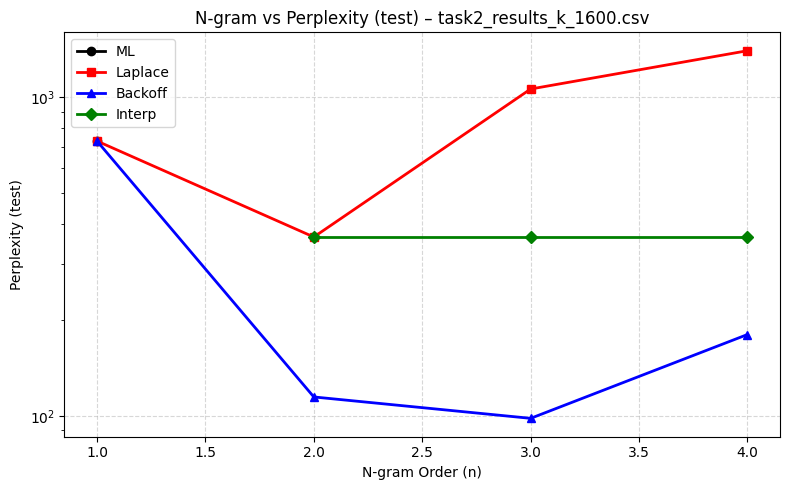

Saved plot: fig_single_k_test_perplexity.png

=== Bigram vs k (TEST) Perplexity Table ===
      k     backoff      interp     laplace   ml
0  1000   85.434652  189.965574  189.965574  inf
1  1200   95.800395  243.144065  243.144065  inf
2  1400  105.484992  301.293716  301.293716  inf
3  1600  114.639808  364.126251  364.126251  inf
4  1800  125.016303  423.240662  432.338985  inf
5  2000  135.093991  483.628576  504.604716  inf
Saved table: report_bigram_vs_k_test_perplexity.csv  &  report_bigram_vs_k_test_perplexity.md


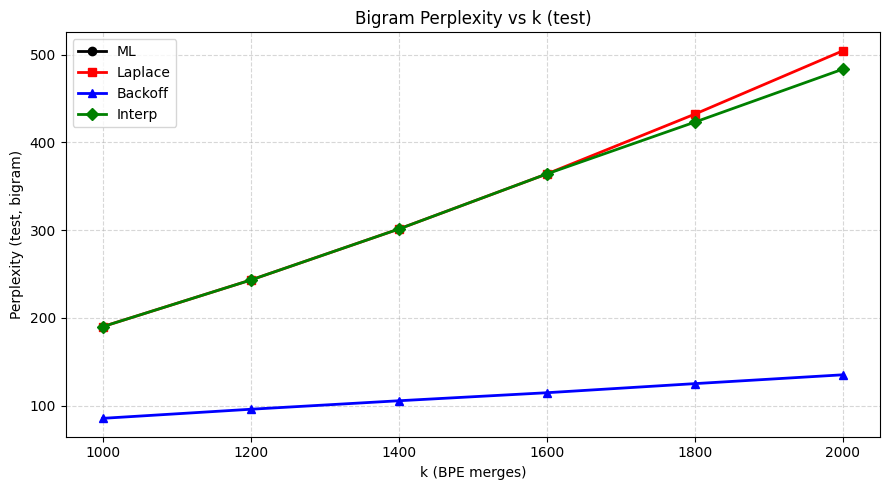

Saved plot: fig_bigram_vs_k_test.png


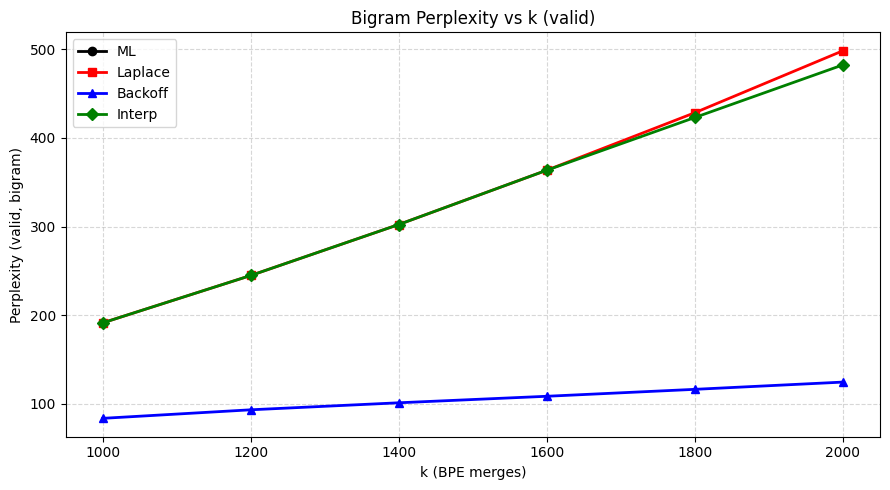

Saved plot: fig_bigram_vs_k_valid.png

=== Best per n (TEST) ===
   n best_mode  best_test_ppl
0  1        ml     728.544203
1  2   backoff     114.639808
2  3   backoff      98.217799
3  4   backoff     180.003912
Saved table: report_single_k_best_per_n_test.csv  &  report_single_k_best_per_n_test.md
Saved table: report_backoff_gains_singlek_test.csv  &  report_backoff_gains_singlek_test.md
Saved table: report_backoff_gains_bigram_test.csv  &  report_backoff_gains_bigram_test.md


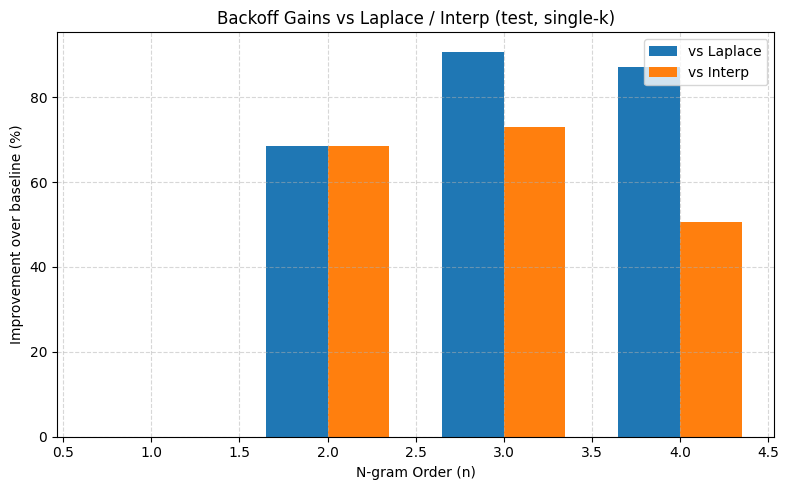

Saved plot: fig_backoff_gains_singlek_test.png


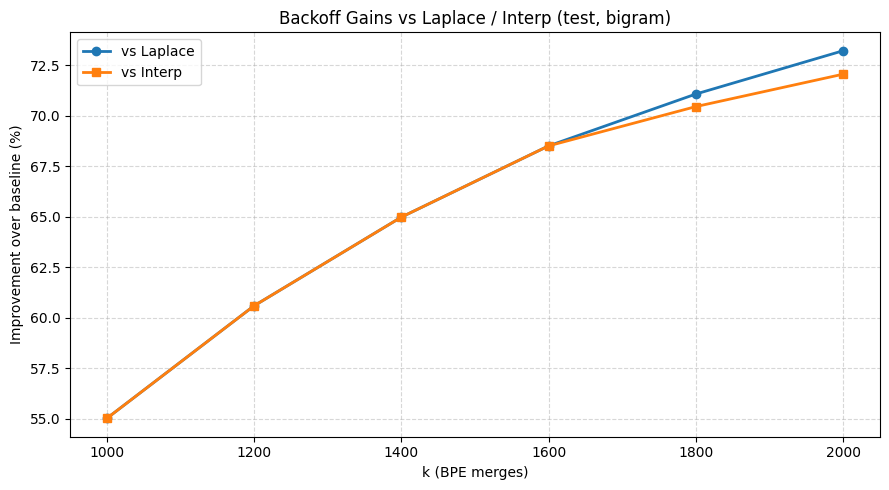

Saved plot: fig_backoff_gains_bigram_vs_k_test.png

All report artifacts saved.
- report_single_k_test_perplexity.(csv|md)
- fig_single_k_test_perplexity.png
- report_bigram_vs_k_test_perplexity.(csv|md)
- fig_bigram_vs_k_test.png
- (optional) fig_bigram_vs_k_valid.png
- report_single_k_best_per_n_test.(csv|md)
- report_backoff_gains_singlek_test.(csv|md)
- report_backoff_gains_bigram_test.(csv|md)
- fig_backoff_gains_singlek_test.png
- fig_backoff_gains_bigram_vs_k_test.png


In [ ]:
# =============================================================================
# REPORT TABLES + PLOTS
# =============================================================================

# -----------------------------
#white background
# -----------------------------
plt.style.use("default")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"]   = "white"
plt.rcParams["savefig.facecolor"]= "white"
plt.rcParams["axes.grid"]        = True
plt.rcParams["grid.alpha"]       = 0.5
plt.rcParams["grid.linestyle"]   = "--"

# -----------------------------
# Helpers
# -----------------------------
def normalize_mode(col: pd.Series) -> pd.Series:
    """'interp[0.0, 1.0]' gibi değerleri 'interp' olarak normalize eder."""
    return col.astype(str).map(lambda x: 'interp' if x.startswith('interp') else x)

def safemin(series: pd.Series):
    """inf'leri yok sayarak minimumu döndür (hepsi inf ise inf)."""
    try:
        s = pd.to_numeric(series, errors="coerce")
        finite = s.replace([math.inf, float('inf')], np.nan).dropna()
        return float(finite.min()) if not finite.empty else math.inf
    except Exception:
        return float(series.min())

def save_table(df: pd.DataFrame, name: str):
    """CSV + Markdown olarak kaydet."""
    csv_path, md_path = f"{name}.csv", f"{name}.md"
    df.to_csv(csv_path, index=False, encoding="utf-8")
    try:
        with open(md_path, "w", encoding="utf-8") as f:
            f.write(df.to_markdown(index=False))
    except Exception:
        pass
    print(f"Saved table: {csv_path}  &  {md_path}")

def finite_for_plot(series: pd.Series) -> pd.Series:
    """Plot için inf değerleri NaN yap (çizgi kırılmasın)."""
    s = pd.to_numeric(series, errors="coerce")
    return s.replace([math.inf, float('inf')], np.nan)

# -----------------------------
# Load inputs
# -----------------------------
bigram_csv = "task2_bigram_perplexities.csv"

candidates = [f for f in os.listdir(".") if f.startswith("task2_results_k_") and f.endswith(".csv")]
if not candidates:
    raise FileNotFoundError("task2_results_k_*.csv not found. Run your single-k experiment first.")
single_k_csv = max(candidates, key=os.path.getmtime)

print(f"[INFO] Using single-k results: {single_k_csv}")
print(f"[INFO] Using bigram results:   {bigram_csv}")

df_k = pd.read_csv(single_k_csv)
df_bi = pd.read_csv(bigram_csv)

# Normalize modes
df_k["mode_norm"]  = normalize_mode(df_k["mode"])
df_bi["mode_norm"] = normalize_mode(df_bi["mode"])

# -----------------------------------------------------------------------------
# TABLE 1 — Single-k (TEST) Perplexity Table
# -----------------------------------------------------------------------------
single_k_test = df_k[df_k["split"] == "test"].copy()
single_k_agg = (
    single_k_test
    .groupby(["n", "mode_norm"], as_index=False)
    .agg(perplexity=("perplexity", safemin))
    .sort_values(["n","mode_norm"])
)

single_k_pivot = single_k_agg.pivot(index="n", columns="mode_norm", values="perplexity").reset_index()
single_k_pivot.columns.name = None
print("\n=== Single-k (TEST) Perplexity Table ===")
print(single_k_pivot)
save_table(single_k_pivot, "report_single_k_test_perplexity")

# -----------------------------------------------------------------------------
# PLOT 1 — Single-k, test: n vs perplexity (log y)
# -----------------------------------------------------------------------------
mode_styles = {
    "ml":      {"color": "black",  "marker": "o", "label": "ML"},
    "laplace": {"color": "red",    "marker": "s", "label": "Laplace"},
    "backoff": {"color": "blue",   "marker": "^", "label": "Backoff"},
    "interp":  {"color": "green",  "marker": "D", "label": "Interp"},
}
plt.figure(figsize=(8,5))
for m, style in mode_styles.items():
    sub = single_k_agg[single_k_agg["mode_norm"] == m].copy()
    if sub.empty:
        continue
    sub["perplexity"] = finite_for_plot(sub["perplexity"])
    plt.plot(sub["n"], sub["perplexity"],
             marker=style["marker"], linewidth=2, color=style["color"], label=style["label"])
plt.xlabel("N-gram Order (n)")
plt.ylabel("Perplexity (test)")
plt.title(f"N-gram vs Perplexity (test) – {single_k_csv}")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig("fig_single_k_test_perplexity.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved plot: fig_single_k_test_perplexity.png")

# -----------------------------------------------------------------------------
# TABLE 2 — Bigram vs k (TEST) Perplexity Table
# -----------------------------------------------------------------------------
bi_test = df_bi[(df_bi["n"] == 2) & (df_bi["split"] == "test")].copy()
bi_agg = (
    bi_test
    .groupby(["k", "mode_norm"], as_index=False)
    .agg(perplexity=("perplexity", safemin))
    .sort_values(["k","mode_norm"])
)
bi_pivot = bi_agg.pivot(index="k", columns="mode_norm", values="perplexity").reset_index()
bi_pivot.columns.name = None
print("\n=== Bigram vs k (TEST) Perplexity Table ===")
print(bi_pivot)
save_table(bi_pivot, "report_bigram_vs_k_test_perplexity")

# -----------------------------------------------------------------------------
# PLOT 2 — Bigram vs k (TEST)
# -----------------------------------------------------------------------------
plt.figure(figsize=(9,5))
for m, style in mode_styles.items():
    sub = bi_agg[bi_agg["mode_norm"] == m].sort_values("k").copy()
    if sub.empty:
        continue
    sub["perplexity"] = finite_for_plot(sub["perplexity"])
    plt.plot(sub["k"], sub["perplexity"],
             marker=style["marker"], linewidth=2, color=style["color"], label=style["label"])
plt.xlabel("k (BPE merges)")
plt.ylabel("Perplexity (test, bigram)")
plt.title("Bigram Perplexity vs k (test)")
plt.legend()
plt.tight_layout()
plt.savefig("fig_bigram_vs_k_test.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved plot: fig_bigram_vs_k_test.png")

# -----------------------------------------------------------------------------
# (Optional) PLOT 3 — Bigram vs k (VALID)
# -----------------------------------------------------------------------------
bi_valid = df_bi[(df_bi["n"] == 2) & (df_bi["split"] == "valid")].copy()
if not bi_valid.empty:
    bi_v_agg = (
        bi_valid
        .groupby(["k", "mode_norm"], as_index=False)
        .agg(perplexity=("perplexity", safemin))
        .sort_values(["k","mode_norm"])
    )
    plt.figure(figsize=(9,5))
    for m, style in mode_styles.items():
        sub = bi_v_agg[bi_v_agg["mode_norm"] == m].sort_values("k").copy()
        if sub.empty:
            continue
        sub["perplexity"] = finite_for_plot(sub["perplexity"])
        plt.plot(sub["k"], sub["perplexity"],
                 marker=style["marker"], linewidth=2, color=style["color"], label=style["label"])
    plt.xlabel("k (BPE merges)")
    plt.ylabel("Perplexity (valid, bigram)")
    plt.title("Bigram Perplexity vs k (valid)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("fig_bigram_vs_k_valid.png", dpi=150, bbox_inches="tight")
    plt.show()
    print("Saved plot: fig_bigram_vs_k_valid.png")
else:
    print("[INFO] No VALID rows in bigram csv; skipping valid plot.")

# -----------------------------------------------------------------------------
# TABLE 3 — Best per n (TEST)
# -----------------------------------------------------------------------------
def pick_best_per_n(df_single_k_test: pd.DataFrame) -> pd.DataFrame:
    rows = []
    for n_val, sub in df_single_k_test.groupby("n"):
        sub2 = (sub
                .assign(mode_norm=normalize_mode(sub["mode"]))
                .groupby("mode_norm", as_index=False)
                .agg(perplexity=("perplexity", safemin)))
        best = sub2.loc[sub2["perplexity"].idxmin()]
        rows.append({"n": int(n_val), "best_mode": str(best["mode_norm"]), "best_test_ppl": float(best["perplexity"])})
    return pd.DataFrame(rows).sort_values("n")

best_per_n = pick_best_per_n(single_k_test)
print("\n=== Best per n (TEST) ===")
print(best_per_n)
save_table(best_per_n, "report_single_k_best_per_n_test")

# -----------------------------------------------------------------------------
# GAINS — Backoff improvements vs Laplace & Interp
# -----------------------------------------------------------------------------
# Single-k (test)
sk = single_k_pivot.copy()
gains_singlek = []
for _, row in sk.iterrows():
    n = int(row["n"])
    backoff = row.get("backoff", np.nan)
    laplace = row.get("laplace", np.nan)
    interp  = row.get("interp",  np.nan)
    # only finite
    if np.isfinite(backoff) and np.isfinite(laplace):
        gain_l = 100.0 * (laplace - backoff) / laplace
    else:
        gain_l = np.nan
    if np.isfinite(backoff) and np.isfinite(interp):
        gain_i = 100.0 * (interp - backoff) / interp
    else:
        gain_i = np.nan
    gains_singlek.append({"n": n, "gain_vs_laplace_%": gain_l, "gain_vs_interp_%": gain_i})
gains_singlek = pd.DataFrame(gains_singlek)
save_table(gains_singlek, "report_backoff_gains_singlek_test")

# Bigram vs k (test)
gb = bi_pivot.copy()
gains_bi = []
for _, row in gb.iterrows():
    k = int(row["k"])
    backoff = row.get("backoff", np.nan)
    laplace = row.get("laplace", np.nan)
    interp  = row.get("interp",  np.nan)
    if np.isfinite(backoff) and np.isfinite(laplace):
        gain_l = 100.0 * (laplace - backoff) / laplace
    else:
        gain_l = np.nan
    if np.isfinite(backoff) and np.isfinite(interp):
        gain_i = 100.0 * (interp - backoff) / interp
    else:
        gain_i = np.nan
    gains_bi.append({"k": k, "gain_vs_laplace_%": gain_l, "gain_vs_interp_%": gain_i})
gains_bi = pd.DataFrame(gains_bi)
save_table(gains_bi, "report_backoff_gains_bigram_test")

# -----------------------------------------------------------------------------
# PLOT 4 — Gains (single-k)
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,5))
x = gains_singlek["n"].astype(int).values
w = 0.35
plt.bar(x - w/2, gains_singlek["gain_vs_laplace_%"], width=w, label="vs Laplace", color="#1f77b4")
plt.bar(x + w/2, gains_singlek["gain_vs_interp_%"],  width=w, label="vs Interp",  color="#ff7f0e")
plt.xlabel("N-gram Order (n)")
plt.ylabel("Improvement over baseline (%)")
plt.title("Backoff Gains vs Laplace / Interp (test, single-k)")
plt.legend()
plt.tight_layout()
plt.savefig("fig_backoff_gains_singlek_test.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved plot: fig_backoff_gains_singlek_test.png")

# -----------------------------------------------------------------------------
# PLOT 5 — Gains (bigram vs k)
# -----------------------------------------------------------------------------
if not gains_bi.empty:
    plt.figure(figsize=(9,5))
    plt.plot(gains_bi["k"], gains_bi["gain_vs_laplace_%"], marker="o", linewidth=2,
             label="vs Laplace", color="#1f77b4")
    plt.plot(gains_bi["k"], gains_bi["gain_vs_interp_%"],  marker="s", linewidth=2,
             label="vs Interp",  color="#ff7f0e")
    plt.xlabel("k (BPE merges)")
    plt.ylabel("Improvement over baseline (%)")
    plt.title("Backoff Gains vs Laplace / Interp (test, bigram)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("fig_backoff_gains_bigram_vs_k_test.png", dpi=150, bbox_inches="tight")
    plt.show()
    print("Saved plot: fig_backoff_gains_bigram_vs_k_test.png")

print("\nAll report artifacts saved.\n"
      "- report_single_k_test_perplexity.(csv|md)\n"
      "- fig_single_k_test_perplexity.png\n"
      "- report_bigram_vs_k_test_perplexity.(csv|md)\n"
      "- fig_bigram_vs_k_test.png\n"
      "- (optional) fig_bigram_vs_k_valid.png\n"
      "- report_single_k_best_per_n_test.(csv|md)\n"
      "- report_backoff_gains_singlek_test.(csv|md)\n"
      "- report_backoff_gains_bigram_test.(csv|md)\n"
      "- fig_backoff_gains_singlek_test.png\n"
      "- fig_backoff_gains_bigram_vs_k_test.png")


### Perplexity Analysis

Maximum likelihood estimation (no smoothing) yielded infinite perplexity values for all models with n ≥ 2 in both the validation and test sets. This outcome is expected given that, as the BPE vocabulary grows, many higher-order n-grams are unseen, resulting in zero probabilities and log(0) → ∞.

Both Laplace smoothing and interpolation (with λ tuned on the validation set) performed similarly for bigram models (n = 2), as the grid search consistently selected λ = [0, 1]—indicating a complete reliance on the bigram distribution. For n = 3 and n = 4, interpolation perplexity remained constant (~364), suggesting that the optimal λ values placed all weight on the bigram component (e.g., [0, 1, 0] for trigrams), likely due to the sparsity of higher-order n-grams.

As the number of BPE merges (k) increased from 1000 to 2000, perplexity under Laplace and interpolation smoothing increased as well. This trend is consistent with the fact that larger vocabularies lead to sparser n-gram counts and, consequently, higher perplexity.

Stupid backoff produced the lowest perplexity scores across all n ≥ 2 (e.g., ≈98 for n = 3, ≈115 for n = 2), and its growth in perplexity with k was substantially slower compared to other methods. However, as stupid backoff is not a normalized probability model, its perplexity values are not directly comparable to those from proper probability distributions and should be considered only as an auxiliary baseline.

***Main Results: ***

Infinite perplexity for ML estimators confirms the necessity of smoothing.

Validation-based interpolation tuning heavily favors bigram models for this dataset.

Higher k values lead to increased perplexity for Laplace and interpolation.

Backoff yields lower perplexity but lacks probabilistic normalization; primary comparisons should focus on Laplace and interpolation results.

## Task 3

Implement neural embeddings – either hardcode or softer version, using PyTorch
Watch RAM during training, especially for higher batch sizes (>=32)

### Hardcode
Hardcode version:
* No PyTorch, no ML libraries, only numpy (at least for the neural embeddings,
can use PyTorch, etc. for GPT implementation)
    * Can use Counter and defaultdict from Collections
    * We can, but do not have to hardcode the optimiser (can use Adam,
need to use at least SGD)
* Measure perplexity
* Implement early stopping (when validation error/loss diverges from training
error to avoid overfitting to training set) with patience
    * Do not need to optimise for patience, but can
    * Save top k (the amount that fits reasonably on your disk) of model
checkpoints (can name that file for validation score and iteration)

### Softer Version

* Using PyTorch
* Implement early stopping (when validation error/loss diverges from training
error to avoid overfitting to training set) with patience
    * Do not have to optimise patience, but can
    * Save top k (the amount that fits reasonably on disk) of model
checkpoints (can name that file for validation score and iteration)
* Tune hyperparameters using a grid search for each separately and
validation set (order is important: number of merges, learning rate, weights of
interpolation) – do not have to do all of this to pass, but for 1.0
    * vocabulary size – gridsearch for max. 10 different amounts of merges
    * learning rate of optimiser
    * interpolation
* Try versions with different optimisers